# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
Temp = []
MaxTemp = []
Humidity = []
Cloudiness = []
WindSpeed = []
Latitude = []
Longitude = []
CityID = []
City = []
LatLong = []
CountryCode = []


for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Humidity.append(response['main']['humidity'])
        Temp.append(response['main']['temp'])
        Cloudiness.append(response['clouds']['all'])
        WindSpeed.append(response['wind']['speed'])
        CityID.append(response['id'])
        City.append(response['name'])
        MaxTemp.append(response['main']['temp_max'])
        LatLong.append(response['coord'])
        CountryCode.append(response['sys']['country'])
        print(f"processing City {city} CityID: {response['id']}")
        
    

processing City vaini CityID: 4032243
processing City maragogi CityID: 3395458
processing City ushuaia CityID: 3833367
processing City fortuna CityID: 5563839
processing City kalispell CityID: 5660340
processing City arraial do cabo CityID: 3471451
processing City iznik CityID: 745026
processing City constitucion CityID: 3893726
processing City vostok CityID: 2013279
processing City bluff CityID: 2206939
processing City havre-saint-pierre CityID: 5972291
processing City port elizabeth CityID: 964420
processing City nome CityID: 5870133
processing City puerto ayora CityID: 3652764
processing City saskylakh CityID: 2017155
processing City mataura CityID: 6201424
processing City ikungi CityID: 159267
processing City jimo CityID: 1805757
processing City punta arenas CityID: 3874787
processing City cabo san lucas CityID: 3985710
processing City kamaishi CityID: 2112444
processing City kapaa CityID: 5848280
processing City upernavik CityID: 3418910
processing City jamestown CityID: 5122534
p

processing City palauig CityID: 1696188
processing City husavik CityID: 2629833
processing City aklavik CityID: 5882953
processing City mama CityID: 2020313
processing City tynda CityID: 2014718
processing City flinders CityID: 6255012
processing City inza CityID: 556283
processing City biloela CityID: 2175819
processing City severo-kurilsk CityID: 2121385
processing City shache CityID: 1280037
processing City anadyr CityID: 2127202
processing City komsomolskiy CityID: 1513491
processing City saldanha CityID: 3361934
processing City ust-maya CityID: 2013918
processing City quesnel CityID: 6115187
processing City archidona CityID: 2521673
processing City luena CityID: 3347719
processing City horsham CityID: 2646557
processing City kloulklubed CityID: 7671223
processing City gat CityID: 293842
processing City esperance CityID: 2071860
processing City tucuma CityID: 3385980
processing City juneau CityID: 5554072
processing City coquimbo CityID: 3893629
processing City dunedin CityID: 2191

processing City corn island CityID: 3620266
processing City birao CityID: 240210
processing City saint george CityID: 5546220
processing City kaliua CityID: 158514
processing City kargasok CityID: 1504382
processing City inhambane CityID: 1045114
processing City avera CityID: 4231997
processing City saint-francois CityID: 2980080
processing City namibe CityID: 3347019
processing City bloomfield CityID: 5095779
processing City waipawa CityID: 2206874
processing City egvekinot CityID: 4031742
processing City sparta CityID: 5273927
processing City laguna CityID: 5364271
processing City xuanhua CityID: 2033574
processing City vardo CityID: 777019
processing City madimba CityID: 878141
processing City yarada CityID: 1252783
processing City dingle CityID: 1714733
processing City praia CityID: 3374333
processing City chunskiy CityID: 1507636
processing City marsa matruh CityID: 352733
processing City grindavik CityID: 3416888
processing City stykkisholmur CityID: 3412888
processing City ovall

In [5]:
### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame
city_df = pd.DataFrame({'CityID' : CityID,
                    'City' : City,
                    'Humidity' : Humidity,
                    'Temp' : Temp,
                    'Latitude' : Latitude,
                    'Cloudiness' : Cloudiness,
                    'WindSpeed' : WindSpeed,
                    'MaxTemp' : MaxTemp,
                    'Longitude' : Longitude,
                     'LatLong' : LatLong,
                     'CountryCode' : CountryCode
                       })

city_df

city_df.to_csv('city_df.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

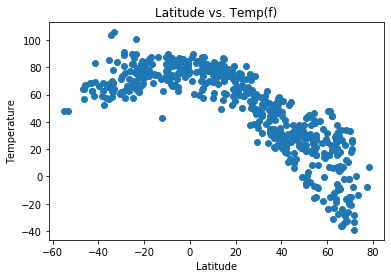

In [6]:
x_values = city_df['Latitude']
y_values = city_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temp(f)')

plt.savefig('Latitude-Temp.png', dpi=100)
plt.show()

#This scatter plot is showing the relationship between Temperature and Latititue. It shows that the temperature is highest between
# -20 and +20 latitude, or the closer to 0 the higher the temp.


#### Latitude vs. Humidity Plot

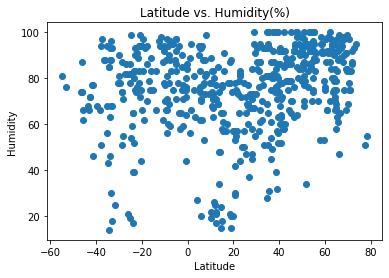

In [9]:
x_values = city_df['Latitude']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity(%)')
plt.savefig('Latitude-Humidity.png')
plt.show()

#This is plotting the humidity % for each location based on it's latitude.

#### Latitude vs. Cloudiness Plot

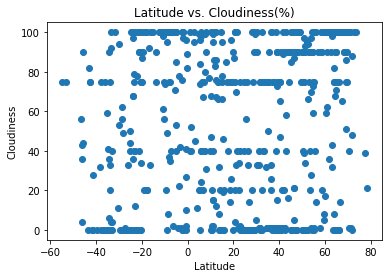

In [10]:
x_values = city_df['Latitude']
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness(%)')
plt.savefig('Latitude-Cloudiness(%).png')
plt.show()

#This scatter plot is showing the relationship between latitude and cloudiness, which does not seem to be linked.

#### Latitude vs. Wind Speed Plot

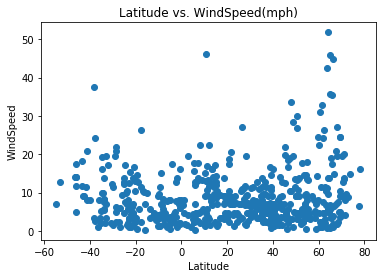

In [11]:
x_values = city_df['Latitude']
y_values = city_df['WindSpeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.title('Latitude vs. WindSpeed(mph)')
plt.savefig('Latitude-WindSpeed.png')
plt.show()

#This is plotting the wind speed of each latitude.

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
NorthHemi_df = city_df[city_df['Latitude']>=0]
SouthHemi_df = city_df[city_df['Latitude']<0]

NorthHemi_df.head()
SouthHemi_df.head()

,CityID,City,Humidity,Temp,Latitude,Cloudiness,WindSpeed,MaxTemp,Longitude,LatLong,CountryCode
0,4032243,Vaini,78,82.40,-21.20,40,13.87,82.40,-175.20,"{'lon': -175.2, 'lat': -21.2}",TO
1,3395458,Maragogi,81,81.70,-9.01,100,15.08,81.70,-35.22,"{'lon': -35.22, 'lat': -9.01}",BR
2,3833367,Ushuaia,81,48.20,-54.80,75,6.93,48.20,-68.30,"{'lon': -68.3, 'lat': -54.8}",AR
5,3471451,Arraial do Cabo,90,75.45,-22.97,100,3.09,75.45,-42.03,"{'lon': -42.03, 'lat': -22.97}",BR
7,3893726,Constitucion,94,56.61,-35.33,59,5.23,56.61,-72.42,"{'lon': -72.42, 'lat': -35.33}",CL


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

3      36.885188
4      26.984115
6      37.106659
8      29.211857
10     24.339487
         ...    
548    46.851398
549    63.631110
550    30.853350
551    32.351539
552    21.095583
Name: Latitude, Length: 391, dtype: float64
y = -1.3x +89.78
The r-squared is: 0.756019180848213


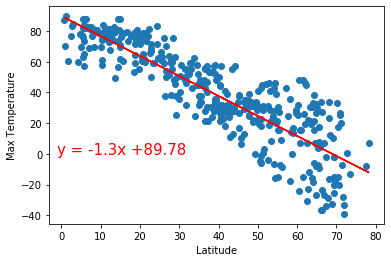

In [13]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['MaxTemp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-1,0),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot

plt.savefig('Lat-Temp North.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      74.455559
1      78.355405
2      63.706188
5      73.889297
7      69.935064
         ...    
530    75.316148
532    73.163075
533    72.033751
539    66.563089
542    77.414835
Name: Latitude, Length: 162, dtype: float64
y = 0.32x +81.24
The r-squared is: 0.1664752330414298


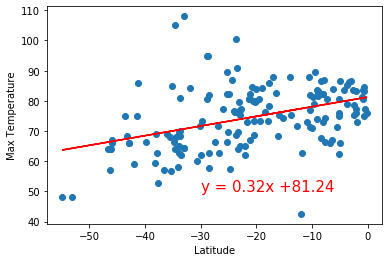

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['MaxTemp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Temp South.png', dpi=100)


In [ ]:
#These 2 plots are showing the max temperatures versus latitude in the northern and southern hemispheres. They show that there is a stronger relationship between latitude and max tempurature in the Northern Hemisphere
#and the max temp in both hemispheres get higher closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

3      76.123703
4      78.859044
6      76.062517
8      78.243592
10     79.589667
         ...    
548    73.370366
549    68.734683
550    77.790101
551    77.376201
552    80.485852
Name: Latitude, Length: 391, dtype: float64
y = 0.36x +61.51
The r-squared is: 0.14296446215570083


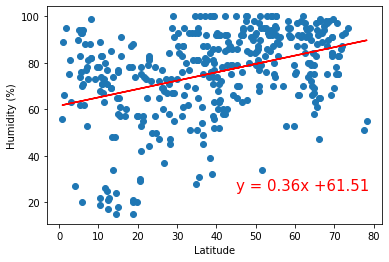

In [15]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot

plt.savefig('Lat-Humidity North.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      75.229201
1      78.241097
2      66.927338
5      74.791871
7      71.737971
         ...    
530    75.893844
532    74.231001
533    73.358811
539    69.133756
542    77.514684
Name: Latitude, Length: 162, dtype: float64
y = 0.25x +80.47
The r-squared is: 0.033226444979457447


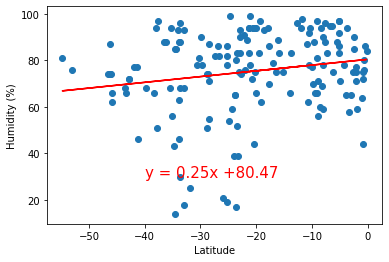

In [16]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot

plt.savefig('Lat-Humidity South.png')
plt.show()

In [ ]:
#These 2 graphs are showing the relationship between latitude and humidity% inthe northern and southern hemispheres. Neither show a very strong corralation, except that they seem to get more humid as you go north.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

3      76.123703
4      78.859044
6      76.062517
8      78.243592
10     79.589667
         ...    
548    73.370366
549    68.734683
550    77.790101
551    77.376201
552    80.485852
Name: Latitude, Length: 391, dtype: float64
y = 0.36x +61.51
The r-squared is: 0.14296446215570083


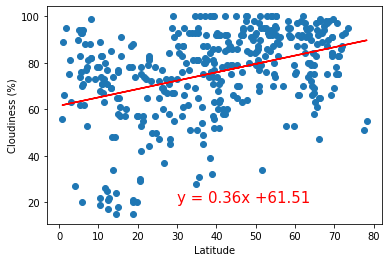

In [17]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot

plt.savefig('Lat-Cloudiness North.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      53.159641
1      62.015350
2      28.750140
5      51.873783
7      42.894574
         ...    
530    55.113854
532    50.224689
533    47.660239
539    35.237546
542    59.879518
Name: Latitude, Length: 162, dtype: float64
y = 0.73x +68.56
The r-squared is: 0.06325418603590269


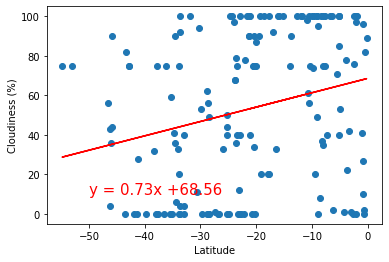

In [18]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot

plt.savefig('Lat-Cloudiness South.png')
plt.show()

In [ ]:
#These 2 charts are plotting the cloudiness at each latitude. There doesn't seem to be much correlation between latutude and clouds except a little bit in the nothern hemisphere where it gets slightly more cloudy in higher latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

3      8.912805
4      9.328833
6      8.903499
8      9.235227
10     9.439957
         ...   
548    8.494039
549    7.788980
550    9.166254
551    9.103302
552    9.576261
Name: Latitude, Length: 391, dtype: float64
y = 0.05x +6.69
The r-squared is: 0.0201427910138606


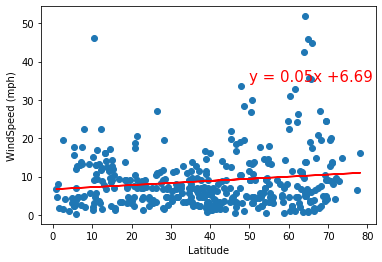

In [19]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['WindSpeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.annotate(line_eq,(50,35),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot

plt.savefig('Lat-Wind North.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0       7.726252
1       5.815344
2      12.993396
5       8.003718
7       9.941274
         ...    
530     7.304567
532     8.359563
533     8.912927
539    11.593527
542     6.276220
Name: Latitude, Length: 162, dtype: float64
y = -0.16x +4.4
The r-squared is: 0.12205588003971186


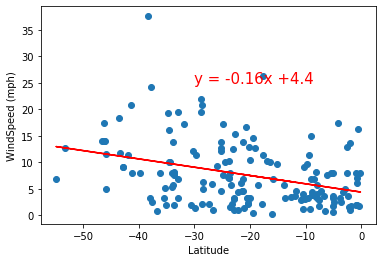

In [20]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['WindSpeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot

plt.savefig('Lat-Wind South.png')
plt.show()

In [ ]:
#These two are showing the correlation between wind speed in mph to latitude in the northern and southern hemispheres.

In [ ]:
#3 observations:
#Temperature increases as latitude gets closer to the equator.
#Humidity seems to increase in general the farther north you go.
#Within the limits set, wind does not seem to get faster than about 3 mph, with one exception at 40 and 2 at 35.
